In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
import os

In [218]:
# Loading the DataFrame using Glob
import glob
directory_path = 'E:/D drive/Bytewise Fellowship/Deep-Learning-BWF-Kanwal-Mehreen/Mini-Project 01/US_Census Data Cleaning'
dfs = []
for file in glob.iglob(f'{directory_path}/*'):
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenating the Data Frames
us_census = pd.concat(dfs , ignore_index=True)
us_census.head()

# Generate a csv after concatenating
us_census.to_csv('Concatenate.csv', index=False)


In [219]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [220]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [221]:

# Splitting the column
us_census[['Male','Female']]=us_census['GenderPop'].str.split('_',expand=True)

# remove the old column and unnecessary unamed col
us_census.drop('GenderPop', axis=1, inplace=True)
us_census.drop('Unnamed: 0', axis=1, inplace=True)

#Rmoving M and F from new columns
us_census['Male'] = us_census['Male'].str.replace('M','')
us_census['Female'] = us_census['Female'].str.replace('F','')

# Replace any empty string with 0
us_census['Male'] = us_census['Male'].replace('', 0)
us_census['Female'] = us_census['Female'].replace('', 0)

#Changing the datatype to int
us_census['Male'] = us_census['Male'].astype(int)
us_census['Female'] = us_census['Female'].astype(int)

# Changing the income datatype to float
us_census['Income'] = us_census['Income'].apply(lambda x: float(x.replace('$', '')))
us_census['Income'] = us_census['Income'].replace('', np.NaN)

# Generate a csv after splitting
us_census.to_csv('AfterSplitting.csv', index=False)

us_census.head()


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329


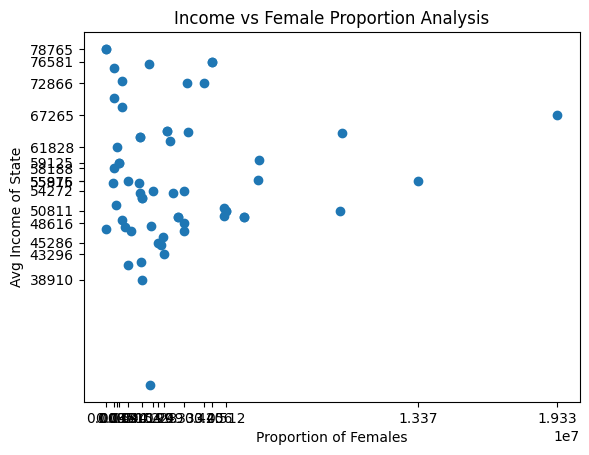

In [222]:


# Tring the scatter plots
plt.scatter(us_census['Female'], us_census['Income'])

# set x and y axis labels and display the graph
plt.xlabel('Proportion of Females')
plt.ylabel('Avg Income of State')

#Removing some ticks just to avoid congestion
plt.xticks(us_census['Female'][::4])
plt.yticks(us_census['Income'][::4])

plt.title('Income vs Female Proportion Analysis')

# create the 'graphs' directory if it does not exist
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# save the graph as a PNG file in the 'graphs' directory
plt.savefig('graphs/scatter_graph.png')

plt.show()

In [223]:
# Checking out for missing values and Duplicates
print(us_census[['Female', 'Income']])

      Female        Income
0    2489527  43296.358603
1     349215  70354.743902
2    3342840  54207.820955
3    1506295  41935.633968
4   19334329  67264.782303
5    2630239  64657.801787
6    2630239  64657.801787
7    1841615  76146.560588
8     478041  61827.976636
9     340810  75466.363636
10  10045763  50690.194987
11   5123362  50811.082051
12   5123362  50811.082051
13    696428  73264.426282
14    806083  48017.315436
15   6556862  59587.048875
16   3333382  48616.227848
17   1558931  53017.753041
18   1558931  53017.753041
19   1453125  53885.612648
20   2233145  45285.802536
21   2364097  44957.993761
22    679019  49181.974359
23         0  78765.400725
24         0  78765.400725
25   3455936  72838.936726
26   5038598  51201.830037
27   2727005  62820.833959
28   1536358  38909.919207
29   3081445  49763.987726
30   3081445  49763.987726
31         0  47645.682836
32    939759  55916.469697
33   1390901  55526.525074
34    670717  68728.859589
35   4561386  76581.083417
3

In [224]:
# Correcting the Missing values
if (us_census['Female'] == 0).any():
    print("Female col has 0 values")
else:
    print("No 0 values")

Female col has 0 values


In [225]:
# Lets replace them and fill them using the estimate
us_census['Female'] = us_census['Female'].replace(0, np.nan)

# Filling the NaN values
us_census['Female'] = us_census['Female'].fillna(us_census['TotalPop'] - us_census['Male'])

# Generate a csv after filling missing values
us_census.to_csv('FilledMissingValues.csv', index=False)

In [226]:
# Checking and correcting Duplicate values
duplicated_rows = us_census[us_census.duplicated()]
print("Number of Duplicated Rows :",len(duplicated_rows))

Number of Duplicated Rows : 9


In [227]:
us_census.drop_duplicates(inplace=True)
us_census.to_csv('DuplicateRemoval.csv', index=False)

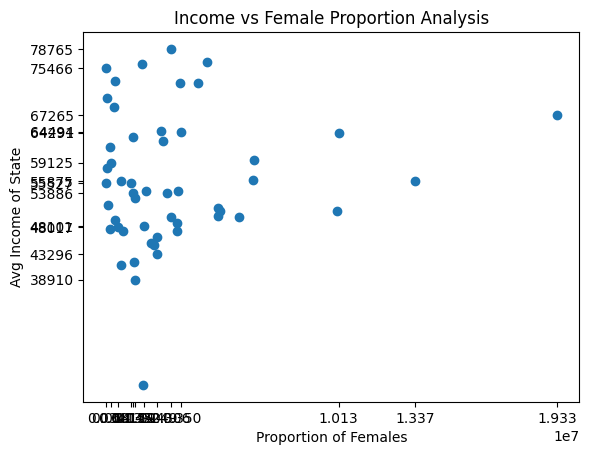

In [228]:
# Tring the scatter plots
plt.scatter(us_census['Female'], us_census['Income'])

# set x and y axis labels and display the graph
plt.xlabel('Proportion of Females')
plt.ylabel('Avg Income of State')

#Removing some ticks just to avoid congestion
plt.xticks(us_census['Female'][::4])
plt.yticks(us_census['Income'][::4])

plt.title('Income vs Female Proportion Analysis')

# create the 'graphs' directory if it does not exist
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# save the graph as a PNG file in the 'graphs' directory
plt.savefig('graphs/new_scatter_graph.png')

plt.show()

In [229]:
# Checking the data for Races
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0


In [230]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

In [231]:
print(us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific']].isnull().sum())

Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
dtype: int64


In [232]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0


In [233]:
# Datatype conversion and % removal
us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific']] = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific']].apply(lambda x: x.str.rstrip('%')).astype(float)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329.0


In [239]:
us_census['Pacific'].fillna(us_census['Pacific'].mean(), inplace=True)

In [240]:
if us_census.isna().any().any():
    print("DataFrame contains NaN values")
else:
    print("DataFrame does not contain NaN values")

DataFrame does not contain NaN values


In [242]:
# Generate a csv after cleaning races
us_census.to_csv('RacesDataCleaned.csv', index=False)

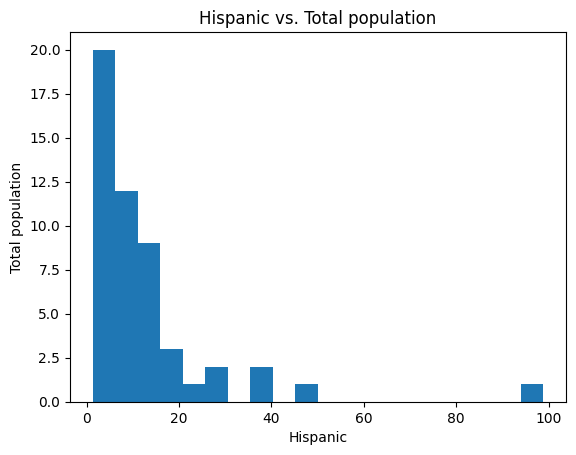

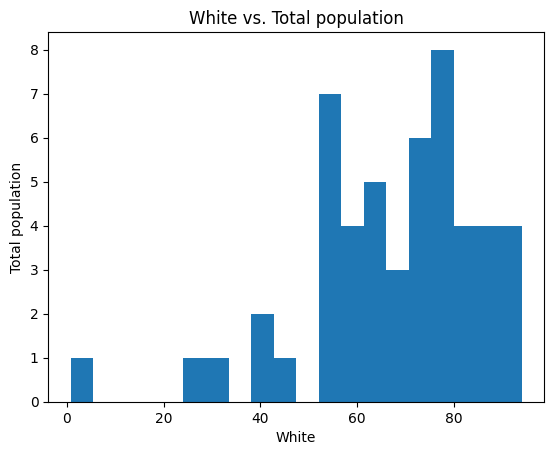

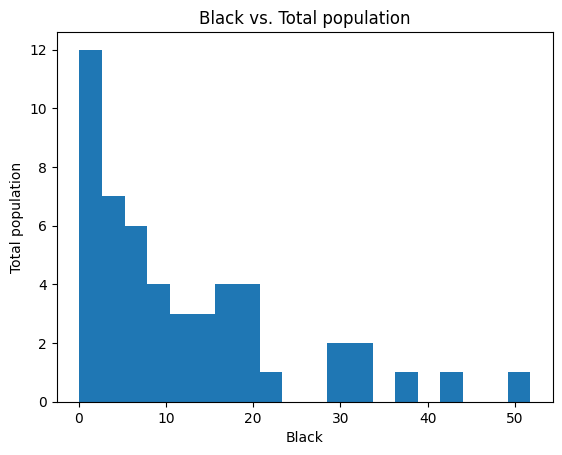

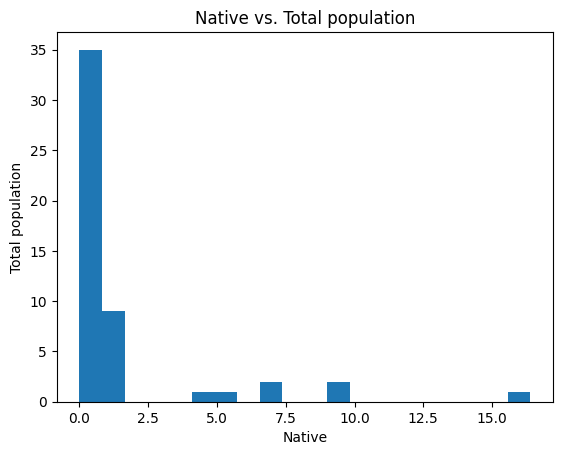

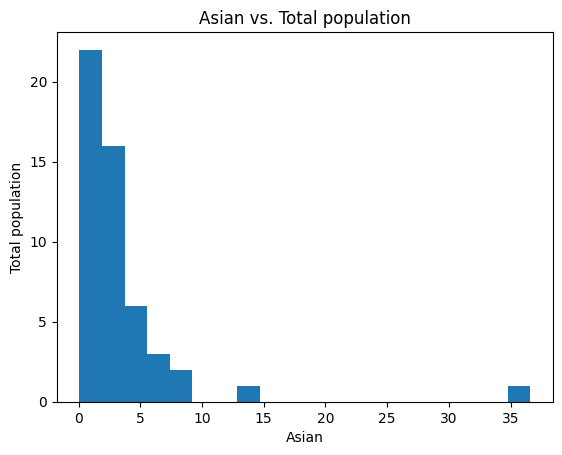

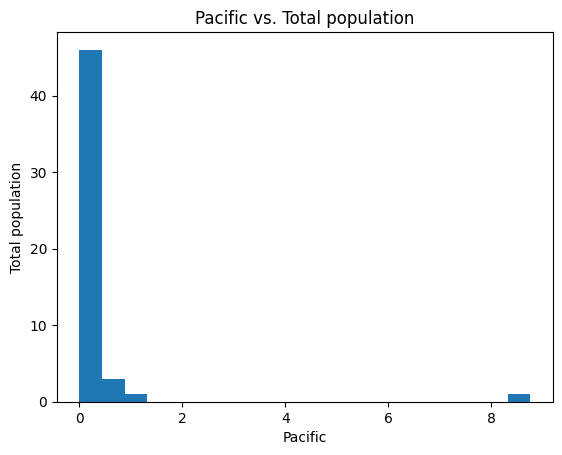

In [247]:
# Generating Histograms

cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian','Pacific']

# loop through columns
for col in cols:
    
    # create histogram of race proportions
    fig, ax = plt.subplots()
    ax.hist(us_census[col], bins=20)
    
    # # set x and y axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('Total population')
    
    # # set title
    ax.set_title(f'{col} vs. Total population')

    # save figure
    fig.savefig(f'graphs/{col}_hist.png')